In [251]:
import geopandas as gp
import pandas as pd
from geopandas import GeoDataFrame
from bokeh.plotting import save
import fiona
from shapely.geometry import Point
import gdal
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Circle, ColorBar, CategoricalColorMapper, LinearColorMapper
from bokeh.plotting import figure, show, ColumnDataSource, output_file
from bokeh.palettes import Category10

from geopandas import GeoDataFrame as gdf
output_notebook()

Loading BokehJS ...

Goal of Notebook:  First approach to getting data read into a map projection by way of Geopandas.  Hover tool tips are active and will show all data on an institution.  Only institutions that are represented on the 2016-17 U.S. Department of Education Institute of Education Sciences Institution list.  See Joining HERD.ipynb in the repo for list of ranks that fell out due to not having an institution ID.  

The Good: Hover tools work well.  Show all data on cursor hover.

The Relevant: pandas data frame 'dp' or data points, and its geopandas Geo Data Frame 'gdp' are used in the current projection.

The Bad: Projection woes are here.  gdalwarp may be a functional saviour (11_18).  Aesthetically this map is ugly.

The Irrelevant:  data frames 'df', 'df2' are currently unused in the map.  They contain different shapefiles that may or may not be useful for our purposes.  

The Possibilities: Refocus only on mainland United States for now (sorry Hawaii and Alaska).  Split entries by state and project only each state's Universities.  Backdrop still outstanding.  

In [220]:
###read in data files
df = gp.read_file("C:/Users/cgdeer/Downloads/cb_2017_us_nation_5m/cb_2017_us_nation_5m.dbf")
dp = pd.read_csv('~/HERD_Analysis/MergedShort2.csv')
df2= gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [205]:
###check headers, remove ';' to run result
df.head;
dp.head;
df2.head;
df4.head;
type(dp)

pandas.core.frame.DataFrame

In [53]:
###check crs for each data set
df.crs

{'init': u'epsg:4326'}

In [221]:
### Converting a Pandas data frame to a Geopandas GeoDataFrame

geometry= [Point(xy)for xy in zip(dp['LON'], dp['LAT'])]
#dp = dp.drop(['LON', 'LAT'], axis=1)
crs = {'init': 'epsg:4269'}
gdp = GeoDataFrame(dp, crs=crs, geometry=geometry)
type(gdp);
GeoDataFrame.to_file(gdp, "gdp")

In [223]:
gdp.head(2)


,UNITID,Rank,Institution,All federal R&D expenditures,DOD,DOE,HHS,NASA,NSF,USDA,LAT,LON,Othera,geometry
0,162928,1,Johns Hopkins U.b,"2,104,653","1,037,685","9,125","618,525","252,470","37,379",537,39.328977,-76.621595,"148,932",POINT (-76.621595 39.328977)
1,236948,2,"U. Washington, Seattle","946,787","85,472","30,932","612,050","16,815","113,679","15,404",47.656213,-122.313115,"72,435",POINT (-122.313115 47.656213)


In [ ]:
### the data in dp for LAT LON were developed from Census 
###TIGER GCS North American Datum of 1983 (GCS NAD83), loading the
###shapefile included in the EDGE_GEOCODE_POSTSECSCH_1617 shows that we
###want to be in Epsg:4269, not EPSG:4326.
###Next three cells were confirming this and can be OMITTED

In [61]:
###df3file='c:/Users/cgdeer/HERD_Analysis/EDGE_GEOCODE_POSTSECSCH_1617/EDGE_GEOCODE_POSTSECSCH_1617.dbf'

In [62]:
#df3= gp.read_file(df3file)

In [63]:
#df3.crs

{'init': u'epsg:4269'}

In [233]:
df = df.to_crs({'init':'epsg:5070'})
df2 = df2.to_crs({'init':'epsg:5070'})
#add shapefile conversion

In [196]:
df2.crs

{'init': 'epsg:4269'}

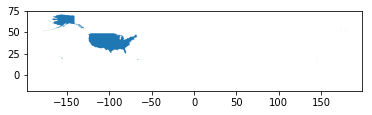

In [65]:
###%matplotlib inline
###ax= df.plot()



In [86]:
##make a copy of df2 as a operating variable
df4= df2

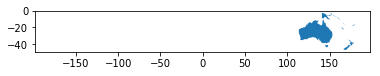

In [89]:
###make a variable to contain Guam
df5 = df2[df2['continent']=='Oceania']
dx=df5.plot()

In [77]:
### I wanted to reduce the map to only USA, Puerto Rico, and Guam.
### However, gp.overlay with a how=intersection doesnt work bc df3 doesn't
### contain multi geometries. smae goes with how='union'


###df34intersect = gp.overlay(df3,df4, how='intersection')

In [85]:
###Select North America 
df6 = df4[df4['continent'] == 'North America']


TypeError: unsupported operand type(s) for &: 'str' and 'str'

{'init': 'epsg:4269'}

In [40]:
geomP= [Point(xy) for xy in zip(dp["LON"], dp["LAT"])]

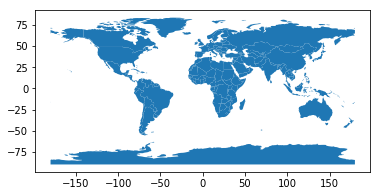

In [67]:
%matplotlib inline
bx= df2.plot()

In [259]:
###trying to follow example from https://bokeh.pydata.org/en/latest/docs/gallery/texas.html
#failed
###trying to follow example from http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/
#without the GMap stuff
color_mapper= LinearColorMapper(palette='Viridis6')
source = ColumnDataSource(
data=dict(
        lat = gdp.LAT.tolist(),
        lon = gdp.LON.tolist(),
        rank= gdp.Rank.tolist(),
        institution= gdp.Institution.tolist(),
        
        DOD= gdp.DOD.tolist(),
        DOE= gdp.DOE.tolist(),
        NSF= gdp.NSF.tolist(),

        
    ))
circle =Circle(x='lon',y='lat', size=5, fill_alpha='rank')

In [245]:
output_file("toolbar.html")

p = figure(plot_width=1080, plot_height=720, title="Points with Tooltips",
            toolbar_location='below', toolbar_sticky=False)
p.add_glyph(source, circle)
tools='pan, wheel_zoom, reset'
p.add_tools
hover = HoverTool()
hover.tooltips =[
    ('institution', '@institution'),
    ('lon ', '@lon'),
    ('lat ', '@lat'),
    ('rank', '@rank'),
    ('DOD ', '@DOD'),
    ('DOE ', '@DOE'),
    ('NSF ', '@NSF')

    ]
p.tools.append(hover)        
         
show(p)